## 一元正态分布中的离群点
&emsp;&emsp;设属性$x$取自具有均值$0$和标准差$1$的高斯分布.一个具有属性值$x$的对象是离群点,如果    
$$ |x| \geq c $$  
其中,$c$是一个选定的常量,满足$ \mathrm{prob}(|x| \geq c = \alpha)$   
&emsp;&emsp;为了使用该定义,需要指定$\alpha值$,从不寻常的值(对象)预示来自不同分布的值的观点来说,
$\alpha$表示我们错误地将来自给定分布的值分类为离群点的概率.从离群点是$N(0,1)$分布的稀有值的观点来
说,$\alpha$表示稀有程度

In [39]:
import pandas as pd
import  numpy as np
import  matplotlib.pyplot as plt
from scipy import  stats
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

data = pd.Series(np.random.randn(1000) * 100)
data.head()

0   -146.217125
1   -117.725712
2   -218.477955
3    -17.953589
4     72.662436
dtype: float64

In [40]:
u = data.mean()
std = data.std(ddof=1)
_, pval = stats.kstest((data-u)/std, 'norm') # 正态性检验
pval

0.76795654215597

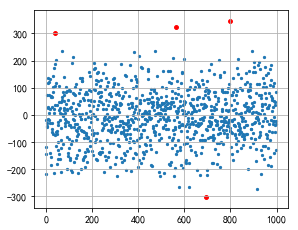

In [44]:
plt.figure(figsize=(10, 8))
ax1 = plt.subplot(211)
sns.kdeplot(data, shade=True, color="r", label='核密度密度曲线')
ax1.axvline(-3*std, color='red', linestyle='--')
ax1.axvline(3*std, color='red', linestyle='--')
ax1.legend()

error = data[np.abs(data - u) > 3*std] # 3sigam原则
data_c = data[np.abs(data - u) <= 3*std]
ax2 = plt.subplot(221)
ax2.scatter(data_c.index, data_c, s=5)
ax2.scatter(error.index, error, color='red', s=15)
ax2.grid()